In [1]:
import pandas as pd
import hashlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


def anonymize_by_sha256(data):
    return hashlib.sha256(data.encode()).hexdigest()


df_hungarian_events = pd.read_csv("Data/athlete_events.csv")
df_hungarian_events = df_hungarian_events.loc[df_hungarian_events["NOC"] == "HUN"]
df_hungarian_events["Name"] = df_hungarian_events["Name"].apply(anonymize_by_sha256)

#### Anonymizing by using SHA-256

In [2]:
df_hungarian_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
208,99,3d783a420a34bbe55508bbd5f6eaf42e2a5c8804a13ac6...,M,30.0,181.0,79.0,Hungary,HUN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Sabre, Team",Silver
209,100,ed7fb6924e1b785bfd0d7d8f53af169ad6488abb1505b7...,M,22.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Men's 100 metres Freestyle,NaN
210,100,ed7fb6924e1b785bfd0d7d8f53af169ad6488abb1505b7...,M,22.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Bronze
884,507,557f18d348e2fb24e10d9cc87fb47162eb705d53ae01fe...,M,21.0,192.0,88.0,Hungary,HUN,1988 Summer,1988,Summer,Seoul,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",Bronze
885,507,557f18d348e2fb24e10d9cc87fb47162eb705d53ae01fe...,M,21.0,192.0,88.0,Hungary,HUN,1988 Summer,1988,Summer,Seoul,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold


### 1a. Vilka sporter har Ungern tagit flest medaljer i?

In [3]:
medals_per_sport = (
    df_hungarian_events[df_hungarian_events["Medal"].notna()]
    .groupby("Sport")["Medal"]
    .count()
    .sort_values(ascending=False)
)
print(f"Ungern har tagit flest medaljer i {medals_per_sport.idxmax()}.")
medals_per_sport

Ungern har tagit flest medaljer i Fencing.


Sport
Fencing              236
Water Polo           172
Canoeing             158
Gymnastics           111
Swimming              94
Football              79
Wrestling             55
Athletics             52
Handball              45
Modern Pentathlon     38
Boxing                20
Weightlifting         20
Shooting              17
Figure Skating        12
Judo                   9
Rowing                 8
Art Competitions       5
Sailing                2
Tennis                 1
Equestrianism          1
Name: Medal, dtype: int64

### 1b. Hur många medaljer per OS tog Ungern varje enskilt år?

In [4]:
sorted_medals = (
    df_hungarian_events[df_hungarian_events["Medal"].notna()]
    .groupby(["Year", "Season"])
    .size()
    .sort_values(ascending=False)
)
sorted_medals

Year  Season
1952  Summer    102
1968  Summer     81
1972  Summer     81
1960  Summer     66
1956  Summer     64
1948  Summer     62
1980  Summer     61
1964  Summer     56
1976  Summer     55
2000  Summer     53
1992  Summer     45
1988  Summer     44
1996  Summer     43
1936  Summer     41
2004  Summer     40
1932  Summer     33
1912  Summer     30
2008  Summer     27
2012  Summer     26
2016  Summer     22
1924  Summer     22
1928  Summer     21
1908  Summer     20
1906  Summer     13
1896  Summer      6
1900  Summer      5
1904  Summer      4
1956  Winter      2
1952  Winter      2
1948  Winter      2
1980  Winter      2
1936  Winter      2
1932  Winter      2
dtype: int64

### 1c. Visa ett histogram över åldrar.

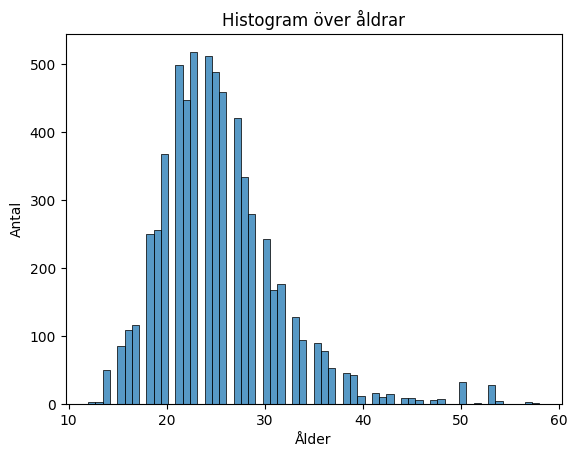

In [5]:
sns.histplot(df_hungarian_events["Age"])
plt.title("Histogram över åldrar")
plt.xlabel("Ålder")
plt.ylabel("Antal")
plt.show()

In [6]:
fig = px.histogram(
    df_hungarian_events,
    x="Age",
    title="Histogram över åldrar",
    labels={"variable": "Antal", "Age": "Ålder"},
)

fig.show()